In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')
df.head()

/var/folders/5p/n3sbx2sd4z9d26_4552pvds00000gn/T/ipykernel_3925/2154752155.py:1: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df)

2029952

In [5]:
len(df.columns)

151

In [6]:
df_bad_loan = df[(df['loan_status'] != 'Fully Paid') & (df['loan_status'] != 'Current')]

In [7]:
null_condition = df_bad_loan.isnull().sum()

In [8]:
keep = df_bad_loan.columns[null_condition / len(df_bad_loan) * 100 < 40].to_list()
len(keep) # There was a sharp decrese in no.low-percentage-null columns betweeen < 45% and >= 45%

93

In [ ]:
keep

In [23]:
final_features = ['id',
 'loan_amnt', 
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'dti',
 'fico_range_low',
 'fico_range_high',
 'revol_bal',
 'revol_util',
 'delinq_amnt',
 'num_accts_ever_120_pd',
 'hardship_flag',
 'debt_settlement_flag']

In [24]:
df = df[final_features]
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,pymnt_plan,dti,fico_range_low,fico_range_high,revol_bal,revol_util,delinq_amnt,num_accts_ever_120_pd,hardship_flag,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,...,n,5.91,675.0,679.0,2765.0,29.7,0.0,2.0,N,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,...,n,16.06,715.0,719.0,21470.0,19.2,0.0,0.0,N,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,...,n,10.78,695.0,699.0,7869.0,56.2,0.0,0.0,N,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,MORTGAGE,...,n,17.06,785.0,789.0,7802.0,11.6,0.0,0.0,N,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,...,n,25.37,695.0,699.0,21929.0,64.5,0.0,0.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,89885898,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,MORTGAGE,...,n,19.61,665.0,669.0,49431.0,84.4,0.0,0.0,N,N
2029948,88977788,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,MORTGAGE,...,n,34.94,695.0,699.0,21665.0,39.0,0.0,12.0,N,N
2029949,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,MORTGAGE,...,n,12.75,705.0,709.0,8633.0,64.9,0.0,6.0,N,N
2029950,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,RENT,...,n,18.30,660.0,664.0,17641.0,68.1,0.0,1.0,N,Y


In [ ]:
# %pip install --upgrade pip
# %pip install openpyxl

Internal Analysis

In [25]:
df_internal = df.copy()

In [74]:
df_internal['issue_d'] = pd.to_datetime(df_internal['issue_d'], format="%b-%Y")
df_internal['issue_d'].head()

0   2015-12-01
1   2015-12-01
2   2015-12-01
3   2015-12-01
4   2015-12-01
Name: issue_d, dtype: datetime64[ns]

In [88]:
def division_percentage(a, b):
    return (a / b) * 100

In [101]:
# total amnt funded per month
ts = pd.DataFrame()
ts['date'] = df_internal['issue_d'].unique()

ts['percentage_satisfied'] = [0.0] * len(df_internal)

for i in range(len(df_internal)):
    ts['percentage_satisfied'][i] += sum(division_percentage(df_internal['funded_amnt'][i], df_internal['funded_amnt_inv'][i])) / df_internal['issue_d'].value_counts()[i]
    
ts.head()

ValueError: Length of values (2029952) does not match length of index (60)

<AxesSubplot:xlabel='date'>

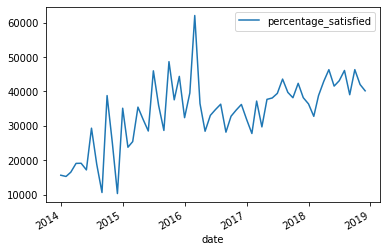

In [79]:
ts.plot('date', 'percentage_satisfied')